In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [7]:
import datajoint_utils as du
import datajoint as dj

In [25]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-12 18:20:56,013 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-12 18:20:56,308 - settings - Setting enable_python_native_blobs to True


# Inspecting Baylor Soma

In [106]:
(schema.jobs & "table_name='__baylor_segment_centroid'")& "status='error'"

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [88]:
minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,volume the volume in billions (10*9 nm^3) of the convex hull,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)


In [70]:
minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,volume the volume in billions (10*9 nm^3) of the convex hull,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,1,29.00,151195,204425,23078,19028,37767,=BLOB=,1,0.818,1774.9898067813228,1.138,5.6,147474.906,565.3138
864691135012398582,0,0.25,1,29.00,256397,172021,21233,20248,40125,=BLOB=,2,0.892,1528.2356333825364,1.206,4.128,55918.289,681.7621
864691135012398582,0,0.25,2,29.00,259228,172686,21595,19340,38392,=BLOB=,2,0.86,1381.4758267331094,1.183,3.825,238864.725,681.7621
864691135012471798,0,0.25,1,29.00,148351,160466,23686,19836,39237,=BLOB=,2,0.79,1359.4990314786876,1.319,3.765,1127255.427,592.3391
864691135012471798,0,0.25,2,29.00,146233,158684,23599,12911,25158,=BLOB=,2,0.79,906.6300003418867,1.284,4.949,2089422.601,592.3391
864691135012571126,0,0.25,1,29.00,144640,135833,22253,37841,74765,=BLOB=,1,0.792,2885.202064287169,1.833,6.681,401769.228,751.079
864691135012905110,0,0.25,1,29.00,179874,177040,16494,29103,56533,=BLOB=,1,0.787,2002.283149743836,1.254,4.476,1446223.939,451.3164
864691135065018692,0,0.25,1,29.00,240123,201750,26340,35489,69644,=BLOB=,2,0.736,3814.666967808354,1.85,6.438,407924.598,481.6432
864691135065018692,0,0.25,2,29.00,240477,186644,26172,12756,24151,=BLOB=,2,0.399,1003.8413342951484,1.519,5.534,5567742.11,481.6432
864691135065024068,0,0.25,1,29.00,256704,178828,18168,46789,91851,=BLOB=,1,0.746,4869.565858574333,1.178,5.073,7651221.993,777.9455


In [86]:
schema.external['somas'].delete(delete_external_files=True)

100%|██████████| 180/180 [00:02<00:00, 67.46it/s]


[]

In [85]:
minnie.BaylorSegmentCentroid.delete()

INFO - 2021-01-13 06:50:59,505 - connection - Transaction started


About to delete:
`microns_minnie65_02`.`__baylor_segment_centroid`: 180 items
Proceed? [yes, No]: yes


INFO - 2021-01-13 06:51:00,641 - connection - Transaction committed and closed.


Committed.


In [82]:
minnie.NeuronGliaNuclei.delete()

INFO - 2021-01-13 06:50:36,766 - connection - Transaction started
INFO - 2021-01-13 06:50:36,776 - connection - Transaction cancelled. Rolling back ...


About to delete:
Nothing to delete


In [83]:
schema.external['faces'].delete(delete_external_files=True)

0it [00:00, ?it/s]


[]

# Inspecting a soma extraction

In [45]:
import system_utils as su

In [46]:
glia_pieces= su.decompress_pickle("glia_pieces")
nuclei_pieces= su.decompress_pickle("nuclei_pieces")
total_soma_list = su.decompress_pickle("total_soma_list")

In [47]:
curr_mesh = du.fetch_segment_id_mesh(864691135403794158)

In [48]:
import neuron_visualizations as nviz

In [49]:
nviz.plot_objects(curr_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [51]:
nviz.plot_objects(meshes=total_soma_list)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Inspecting Decomposition

In [92]:
#schema.external['decomposition'].delete(delete_external_files=True)

100%|██████████| 80/80 [00:01<00:00, 64.31it/s]


[]

In [154]:
minnie.Decomposition()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,110.528,545.626,544.758,2022,0.00019955997643994288,7.352727272727273,5469042.445,122,0.0003697173719777192,16.574,270764755455.50858,71119038.51464462,26722.95164167566,49508.62206290823,2219383241.438595,3221.0944
864691135065024068,0,0.25,29.00,0,0,1,=BLOB=,1683573,3378174,0,2,2,0,1,11,341,101,15436156.56531248,4728701.448726788,29394.698,311.757,282.738,609.362,594.189,4971,0.00032203612207268187,14.577712609970675,12419519.814,240,0.00040025702075827455,20.712,539357389298.1111,63617255.66268921,34941.17120515178,43428.199912376345,2247322455.4087963,6815.4656
864691135065033540,0,0.25,29.00,0,0,1,=BLOB=,788810,1618020,0,2,2,1,2,7,202,142,7316260.375838028,4091724.4008084666,21512.089,103.41,103.41,416.992,381.352,2199,0.0003005633871727972,10.886138613861386,3494175.925,84,0.0006293329377798859,26.179,450362108267.2257,122117801.5433146,61556.3259277305,128889.36273786092,5361453669.847925,1706.8981
864691135210051520,0,0.25,29.00,0,0,1,=BLOB=,498916,1023655,0,1,1,0,1,13,162,65,6094179.568630371,2578115.586153359,19166.911,95.1

In [160]:
((schema.jobs & "table_name='__decomposition'"))

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__decomposition,00471f14c125b842baffaf6ebff1eed1,error,=BLOB=,"Exception: The number of nodes in the concept graph and number of branches passed to it did not match len(curr_limb_concept_network.nodes())=73, len(curr_limb_divided_skeletons)= 74",=BLOB=,celiib@10.28.0.158,at-node31,29,35023,2021-01-13 04:43:27
__decomposition,c127efa43819f30b1efbf507ca52e805,error,=BLOB=,"Exception: The number of nodes in the concept graph and number of branches passed to it did not match len(curr_limb_concept_network.nodes())=613, len(curr_limb_divided_skeletons)= 614",=BLOB=,celiib@10.21.18.111,71caefafdeec,23507,34811,2021-01-13 07:14:06


In [119]:
curr_segment_id = 864691135291788214

In [114]:
neuron_obj = (minnie.Decomposition & dict(segment_id=curr_segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [120]:
minnie.NeuronGliaNuclei() & dict(segment_id=curr_segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia (external storage),n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei (external storage)
864691135291788214,0,0.25,29.00,2580817,=BLOB=,86583,=BLOB=


In [115]:
neuron_obj.segment_id

864691135291788214

In [127]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(),
                     mesh_whole_neuron=True,
                      subtract_glia=False
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [128]:
import neuron_visualizations as nviz
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_whole_neuron=True,
                     subtract_glia=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


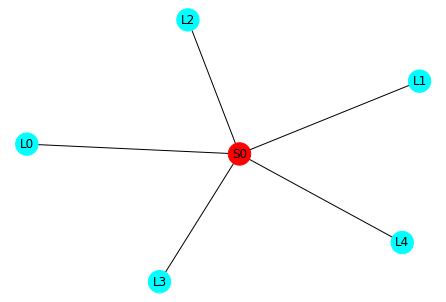

In [117]:
nviz.plot_soma_limb_concept_network(neuron_obj)

# Inspecting Split Suggestions

In [26]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-12 18:21:13,220 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-12 18:21:13,512 - settings - Setting enable_python_native_blobs to True


In [173]:
len(minnie.NeuronSplitSuggestions())

20

In [174]:
(schema.jobs & "table_name='__neuron_split_suggestions'")# & "status='error'"

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,26948,35067,2021-01-13 03:34:10
__neuron_split_suggestions,0a5a5e5fb2ab131e6480313092e4e1da,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8744,35479,2021-01-13 09:44:53
__neuron_split_suggestions,29ef90c9bf67783e41258c6e923a177d,error,=BLOB=,Exception: base_node (68) and upstream_node (81) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10938,35485,2021-01-13 09:49:50
__neuron_split_suggestions,7b6a5fce844b17dde038174a903451a1,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8681,35478,2021-01-13 09:51:34
__neuron_split_suggestions,8e765a57fcf0e32ace865a137199826e,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8870,35481,2021-01-13 09:51:33
__neuron_split_suggestions,95e37cd4f9c807038f845bfb7201546b,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,10537,35484,2021-01-13 09:49:16
__neuron_split_suggestions,b3b2ee77f9057fc00445c72474cc24db,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,8807,35480,2021-01-13 09:48:57
__neuron_split_suggestions,c3d1e06074fcd8dd1a79f28f695bf283,error,=BLOB=,Exception: base_node (27) and upstream_node (29) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,8870,35481,2021-01-13 09:51:33
__neuron_split_suggestions,ea8cdcf91db092f5cf93b6f988b599f7,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,10938,35485,2021-01-13 09:49:50


In [139]:
limb_results = (minnie.NeuronSplitSuggestions() & dict(segment_id=864691135065033540)).fetch1("split_results")

In [143]:
pru.split_info_to_neuroglancer_link(864691135065033540,split_info=limb_results,output_type="server")

segment_id = 864691135065033540


'https://akhilesh-graphene-sharded-dot-neuromancer-seung-import.appspot.com/?json_url=https://globalv1.daf-apis.com/nglstate/api/v1/5750546937937920'

In [144]:
import proofreading_utils as pru
du.create_suggested_splits_neuroglancer_spreadsheet(segment_ids=[864691135065033540])

segment_id = 864691135065033540

